# Regresja

Dane wykorzystywane w pierwszej części ćwiczeń pochodzą z materiałów do książki: [F. Nwanganga, M. Chapple: Praktyczne uczenie maszynowe w języku R]("https://www.wiley.com/en-ie/Practical+Machine+Learning+in+R-p-9781119591511").

## 1. Prosta regresja liniowa

### Wczytanie danych

Pobierz dane `bikes.csv` do swojego katalogu roboczego, a następnie wczytaj je. Użyj argumentu `col_types` żeby ustawić typ poszczególnych kolumn: `D` - data, `f` - faktor, `d` - double.

In [ ]:
#install.packages('tidyverse')

library(tidyverse)
rowery <- read_csv("./bikes.csv", col_types = "Dffffddddd")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Wyświetl podgląd danych za pomocą funkcji `glimpse()`

In [ ]:
glimpse(rowery)

Rows: 731
Columns: 10
$ date        <date> 2011-01-01, 2011-01-02, 2011-01-03, 2011-01-04, 2011-01-0…
$ season      <fct> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ holiday     <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0…
$ weekday     <fct> 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4…
$ weather     <fct> 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2…
$ temperature <dbl> 46.71653, 48.35024, 34.21239, 34.52000, 36.80056, 34.88784…
$ realfeel    <dbl> 46.39865, 45.22419, 25.70131, 28.40009, 30.43728, 30.90523…
$ humidity    <dbl> 0.805833, 0.696087, 0.437273, 0.590435, 0.436957, 0.518261…
$ windspeed   <dbl> 6.679665, 10.347140, 10.337565, 6.673420, 7.780994, 3.7287…
$ rentals     <dbl> 985, 801, 1349, 1562, 1600, 1606, 1510, 959, 822, 1321, 12…


Wyświetl i przeanalizuj statystyki opisowe danych `rowery`.

In [ ]:
summary(rowery)

      date            season  holiday weekday weather  temperature   
 Min.   :2011-01-01   1:181   0:710   6:105   2:247   Min.   :22.60  
 1st Qu.:2011-07-02   2:184   1: 21   0:105   1:463   1st Qu.:46.12  
 Median :2012-01-01   3:188           1:105   3: 21   Median :59.76  
 Mean   :2012-01-01   4:178           2:104           Mean   :59.51  
 3rd Qu.:2012-07-01                   3:104           3rd Qu.:73.05  
 Max.   :2012-12-31                   4:104           Max.   :90.50  
                                      5:104                          
    realfeel         humidity        windspeed          rentals    
 Min.   : 12.59   Min.   :0.0000   Min.   : 0.9322   Min.   :  22  
 1st Qu.: 43.34   1st Qu.:0.5200   1st Qu.: 5.6182   1st Qu.:3152  
 Median : 61.02   Median :0.6267   Median : 7.5343   Median :4548  
 Mean   : 59.55   Mean   :0.6279   Mean   : 7.9303   Mean   :4504  
 3rd Qu.: 75.50   3rd Qu.:0.7302   3rd Qu.: 9.7092   3rd Qu.:5956  
 Max.   :103.10   Max.   :0.9725

Narysuj wykresy punktowe porównujące `rentals` (liczbę wypożyczonych rowerów) do trzech innych zmiennych (`humidity`, `windspeed` oraz `temperature`). Co możesz powiedzieć na temat zależności między zmienną `rentals` a pozostałymi wybranymi zmiennymi na podstawie samych wykresów?

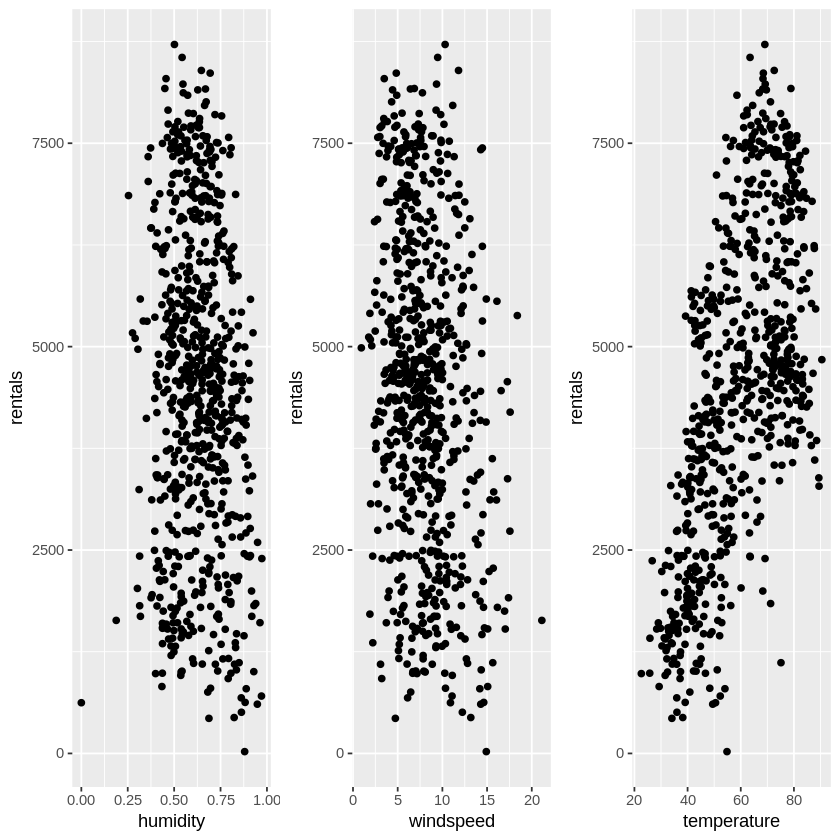

In [ ]:
#install.packages('ggplot2')
#install.packages('gridExtra')

library(ggplot2)

#df <- data.frame(x,y)
humid <- ggplot(data=rowery, aes(x=humidity, y=rentals)) + geom_point()
wind <-  ggplot(data=rowery, aes(x=windspeed, y=rentals)) + geom_point()
temp <-  ggplot(data=rowery, aes(x=temperature, y=rentals)) + geom_point()

library(gridExtra)
grid.arrange(humid, wind, temp, nrow=1, ncol=3)

### Korelacja

Oblicz współczynnik korelacji liniowej Pearsona pomiędzy zmiennymi `rentals` i `humidity`.

In [ ]:
cov(rowery$rentals, rowery$humidity)

sd(rowery$rentals)
sd(rowery$humidity)

pearson <- cov(rowery$rentals, rowery$humidity) /
  (sd(rowery$rentals) * sd(rowery$humidity))

pearson

[1] -27.77323

[1] 1937.211

[1] 0.1424291

[1] -0.1006586

Jaki wniosek można wyciągnąć na temat zależności pomiędzy badanymi zmiennymi na podstawie obliczonego współczynnika korelacji Pearsona?

Oblicz współczynnik korelacji Pearsona między zmienną `rentals` a zmiennymi `temperature` oraz `windspeed`, wykorzystując funkcję `cor()`.

In [ ]:
cor(rowery$temperature, rowery$rentals)
cor(rowery$windspeed, rowery$rentals)

[1] 0.627494

[1] -0.234545

Na podstawie obliczonych współczynników korelacji odpowiedz na pytania:

- Czy istnieje jakaś zależność między liczbą wypożyczonych rowerów a pozostałymi zmiennymi?

- Jeśli istnieje zależność, to jak silna?

Oblicz tabelę współczynników korelacji dla  dla zmiennych liczbowych ze zbioru `rowery`. Następnie zwizualizuj korelacje za pomocą funkcji `corrplot`.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.95 loaded



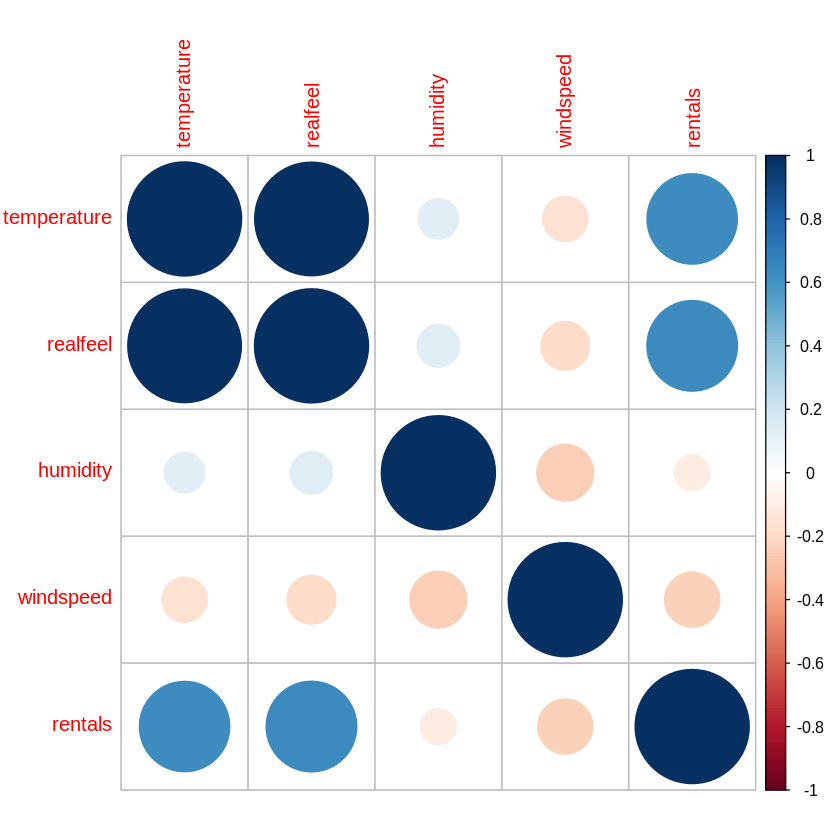

In [ ]:
install.packages('corrplot')

rowery_liczbowe <- rowery %>%
  select(-(date:weather))

rowery_korelacje <- cor(rowery_liczbowe)

library(corrplot)
corrplot(rowery_korelacje)

Ponieważ korelacja między A i B jest taka sama, jak pomiędzy B i A, możemy uprościć wizualizację, pokazując tylko współczynniki nad przekątną - służy do tego argument `type` funkcji `corrplot()`. Ponadto za pomocą argumentu `method` możemy wyświetlić wartości współczynników zamiast kółek.

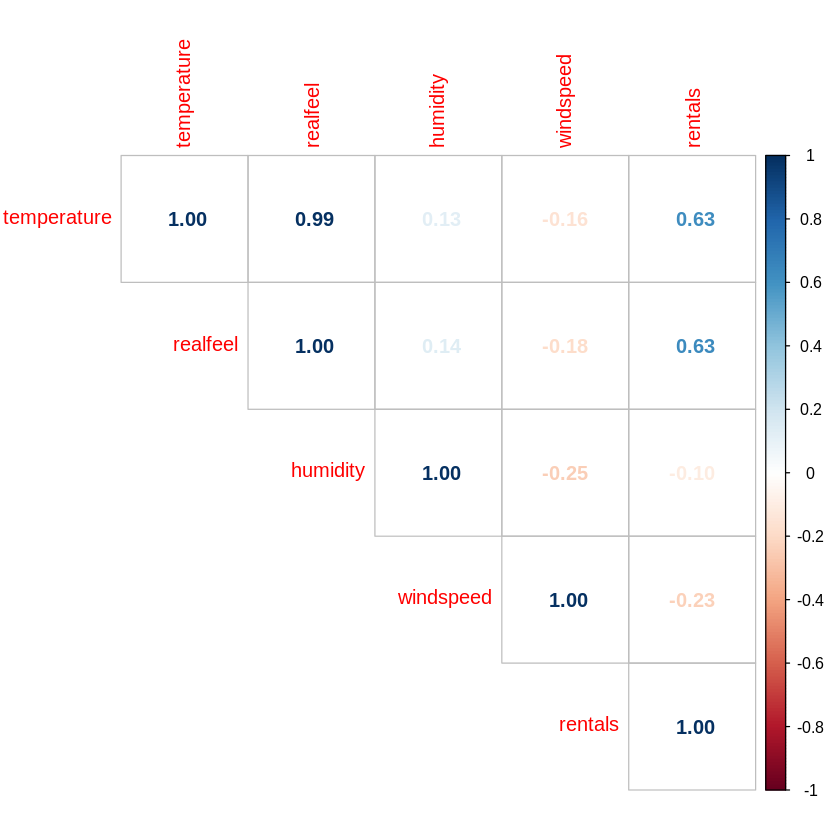

In [ ]:
corrplot(rowery_korelacje, type = "upper", method = "number")

### Współczynniki prostej regresji

Ręcznie uzyskaj wartość współczynników `b0` i `b1`.

In [ ]:
b1 <- cov(rowery$temperature, rowery$rentals) / var(rowery$temperature)
b1

b0 <- mean(rowery$rentals) - b1 * mean(rowery$temperature)
b0

[1] 78.49539

[1] -166.8767

### Model prostej regresji liniowej

Zbuduj model liniowy dla pary zmiennych `rentals` oraz `temperature`.

In [ ]:
rowery_model1 <- lm(data = rowery, rentals~temperature)
rowery_model1


Call:
lm(formula = rentals ~ temperature, data = rowery)

Coefficients:
(Intercept)  temperature  
     -166.9         78.5  


Wyświetl bardziej szczegółowe informacje o modelu za pomocą funkcji `summary()`.

In [ ]:
summary(rowery_model1)


Call:
lm(formula = rentals ~ temperature, data = rowery)

Residuals:
    Min      1Q  Median      3Q     Max 
-4615.3 -1134.9  -104.4  1044.3  3737.8 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -166.877    221.816  -0.752    0.452    
temperature   78.495      3.607  21.759   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1509 on 729 degrees of freedom
Multiple R-squared:  0.3937,	Adjusted R-squared:  0.3929 
F-statistic: 473.5 on 1 and 729 DF,  p-value: < 2.2e-16


Co oznaczają statystyki podsumowujące dla reszt (sekcja `Residuals`)?

## 2. Wielokrotna regresja liniowa

Model uzyskany za pomocą pojedynczego predyktora (`temperature`) tłumaczył około 39% zmienności w zbiorze danych.  W kolejnym modelu uwzględnij dodatkowo zmienne `windspeed` oraz `humidity`.

In [ ]:
rowery_model2 <- lm(data = rowery, rentals~humidity+windspeed+temperature)

summary(rowery_model2)


Call:
lm(formula = rentals ~ humidity + windspeed + temperature, data = rowery)

Residuals:
    Min      1Q  Median      3Q     Max 
-4780.5 -1082.6   -62.2  1056.5  3653.5 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2706.002    367.483   7.364 4.86e-13 ***
humidity    -3100.123    383.992  -8.073 2.83e-15 ***
windspeed    -115.463     17.028  -6.781 2.48e-11 ***
temperature    78.316      3.464  22.606  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1425 on 727 degrees of freedom
Multiple R-squared:  0.4609,	Adjusted R-squared:  0.4587 
F-statistic: 207.2 on 3 and 727 DF,  p-value: < 2.2e-16


Jak oceniasz nowo powstały model?

Napisz równanie w jaki sposób `rentals` zależy od wybranych predyktorów.


## 3. Zadania

1. Pobierz i wczytaj zbiór danych `Advertising.csv`.

2. Odpowiedz na pytania:

- czy istnieje zależność pomiędzy sprzedażą a budżetem reklamowym dla usług `TV`, `radio` oraz `newspaper`.
- jeśli istnieje - jak silna jest ta zależność?
- które media są powiązane ze sprzedażą?
- jak duża jest zależność pomiędzy poszczególnymi mediami a sprzedażą?
- czy zależność jest liniowa?

In [ ]:
ad <- read_csv("Advertising.csv", col_types = "dddd")

glimpse(ad)

New names:
• `` -> `...1`


Rows: 200
Columns: 5
$ ...1      <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 1…
$ TV        <dbl> 230.1, 44.5, 17.2, 151.5, 180.8, 8.7, 57.5, 120.2, 8.6, 199.…
$ radio     <dbl> 37.8, 39.3, 45.9, 41.3, 10.8, 48.9, 32.8, 19.6, 2.1, 2.6, 5.…
$ newspaper <dbl> 69.2, 45.1, 69.3, 58.5, 58.4, 75.0, 23.5, 11.6, 1.0, 21.2, 2…
$ sales     <dbl> 22.1, 10.4, 9.3, 18.5, 12.9, 7.2, 11.8, 13.2, 4.8, 10.6, 8.6…


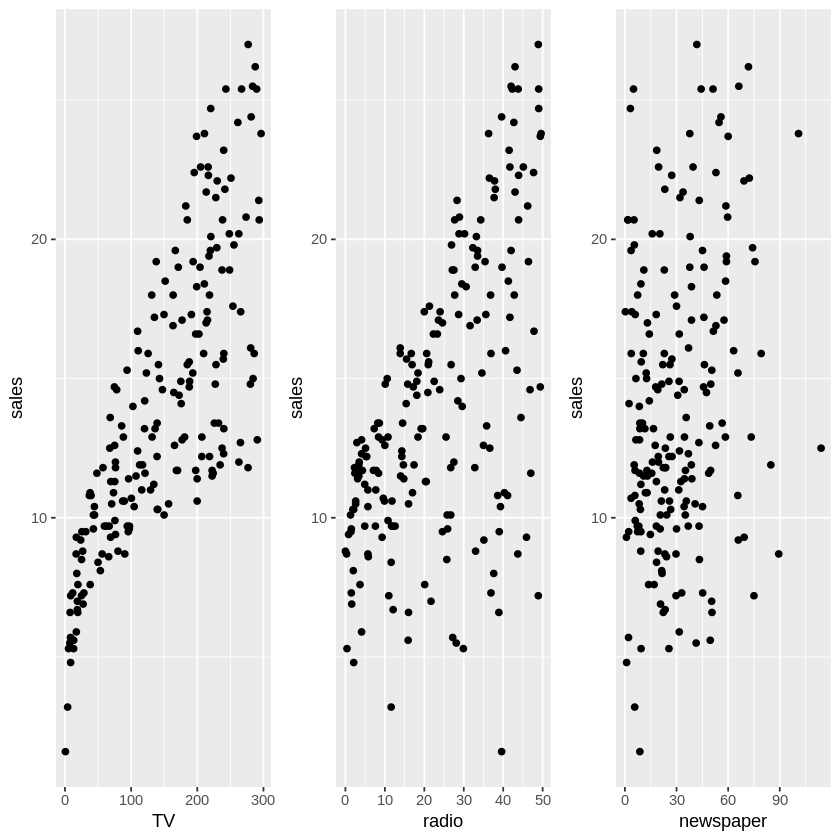

In [ ]:
#df <- data.frame(x,y)
TV <- ggplot(data=ad, aes(x=TV, y=sales)) + geom_point()
radio <-  ggplot(data=ad, aes(x=radio, y=sales)) + geom_point()
newspaper <-  ggplot(data=ad, aes(x=newspaper, y=sales)) + geom_point()

grid.arrange(TV, radio, newspaper, nrow=1, ncol=3)

In [ ]:
cor(ad$TV, ad$sales)
cor(ad$radio, ad$sales)
cor(ad$newspaper, ad$sales)

[1] 0.7822244

[1] 0.5762226

[1] 0.228299

In [ ]:
ad <- ad[, -1]

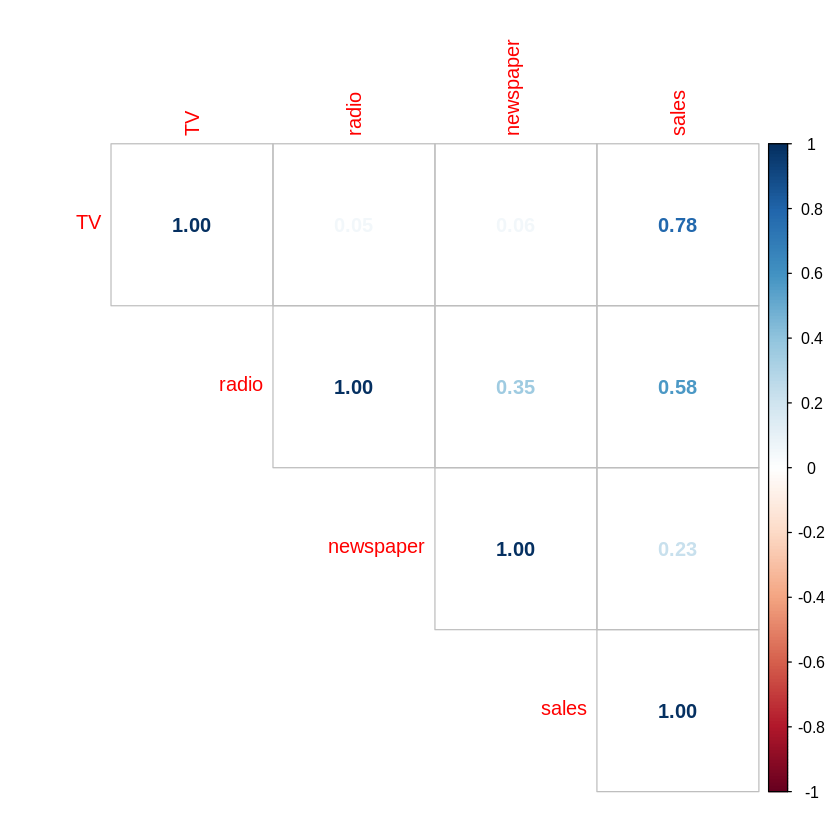

In [ ]:
ad_cor <- cor(ad)

library(corrplot)
corrplot(ad_cor, type = "upper", method = "number")

In [ ]:
ad_model <- lm(data = ad, sales~TV)

summary(ad_model)


Call:
lm(formula = sales ~ TV, data = ad)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.3860 -1.9545 -0.1913  2.0671  7.2124 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 7.032594   0.457843   15.36   <2e-16 ***
TV          0.047537   0.002691   17.67   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.259 on 198 degrees of freedom
Multiple R-squared:  0.6119,	Adjusted R-squared:  0.6099 
F-statistic: 312.1 on 1 and 198 DF,  p-value: < 2.2e-16


In [ ]:
ad_model2 <- lm(data = ad, sales~TV+radio+newspaper)

summary(ad_model2)


Call:
lm(formula = sales ~ TV + radio + newspaper, data = ad)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.8277 -0.8908  0.2418  1.1893  2.8292 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.938889   0.311908   9.422   <2e-16 ***
TV           0.045765   0.001395  32.809   <2e-16 ***
radio        0.188530   0.008611  21.893   <2e-16 ***
newspaper   -0.001037   0.005871  -0.177     0.86    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.686 on 196 degrees of freedom
Multiple R-squared:  0.8972,	Adjusted R-squared:  0.8956 
F-statistic: 570.3 on 3 and 196 DF,  p-value: < 2.2e-16
